In [1]:
#file load
import cv2,os

data_path=r'C:\Users\anodk\Downloads\Real-Time-Face-Mask-Detection-main\Real-Time-Face-Mask-Detection-main\train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [2]:
# pip install opencv-python

In [3]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    #img_names=os.listdir(folder_path)/
    
    for img_name in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image
            


Exception: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [4]:

import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [5]:
np.save('data',data)
np.save('target',new_target)
data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:],padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                    

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=15,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/15
91/91 [==============================] - 16s 174ms/step - loss: 0.6343 - accuracy: 0.6366 - val_loss: 0.5225 - val_accuracy: 0.7648
Epoch 2/15
91/91 [==============================] - 14s 153ms/step - loss: 0.5050 - accuracy: 0.7684 - val_loss: 0.4018 - val_accuracy: 0.8267
Epoch 3/15
91/91 [==============================] - 15s 166ms/step - loss: 0.3741 - accuracy: 0.8297 - val_loss: 0.2802 - val_accuracy: 0.8996
Epoch 4/15
91/91 [==============================] - 15s 163ms/step - loss: 0.2838 - accuracy: 0.8844 - val_loss: 0.2351 - val_accuracy: 0.9051
Epoch 5/15
91/91 [==============================] - 16s 172ms/step - loss: 0.2272 - accuracy: 0.9088 - val_loss: 0.2114 - val_accuracy: 0.9051
Epoch 6/15
91/91 [==============================] - 17s 184ms/step - loss: 0.2180 - accuracy: 0.9174 - val_loss: 0.2088 - val_accuracy: 0.9230
Epoch 7/15
91/91 [==============================] - 18s 198ms/step - loss: 0.1870 - accuracy: 0.9264 - val_loss: 0.1968 - val_accuracy: 0.9188

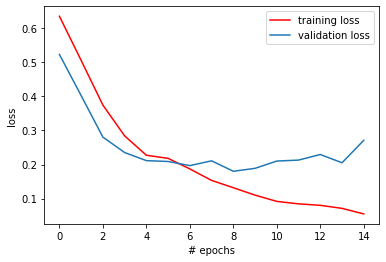

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

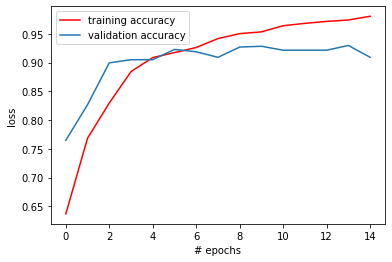

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [12]:
print(model.evaluate(test_data,test_target))

13/13 [==============================] - 0s 31ms/step - loss: 0.2577 - accuracy: 0.8985
[0.2577195167541504, 0.8985148668289185]


In [13]:
# image detect krlo pehla
import cv2 as cv

img = cv.imread(r'C:\Users\anodk\Downloads\Real-Time-Face-Mask-Detection-main\Real-Time-Face-Mask-Detection-main\test\with_mask\31-with-mask.jpg')
print(img.shape)  

(433, 327, 3)


In [14]:
#image 
results={0:'without mask',1:'mask'}
img_size = 100
GR_dict={0:(0,0,255),1:(0,255,0)}
import cv2 as cv
import numpy as np
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

haarcascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = haarcascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=1)

for (x,y,w,h) in faces:
    faces_roi = gray[y:y+h,x:x+w]
    
    resized=cv.resize(faces_roi,(img_size,img_size))
    d=np.array(resized)/255.0
    #print(d.shape)
    #data=np.array(faces_roi)/255.0
    #d.append(resized)
    data=np.reshape(d,(1,img_size,img_size,1))
    
    result=model.predict(data)
    
    label=np.argmax(result)
    
    cv.rectangle(img,(x,y),(x+w,y+h),GR_dict[label],2)
    cv.putText(img, results[label], (x, y-10),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
cv.imshow("Detected Image",img)
cv.waitKey(0)
    

    #resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
     
    #data.append(resized)


-1

In [15]:
#im saving this model as results are quite good
model.save('mask_project_new.h5')

In [16]:
#first
import tensorflow as tf

model = tf.keras.models.load_model('mask_project_new.h5')

In [17]:
os.getcwd()

'C:\\Users\\anodk\\Downloads\\Real-Time-Face-Mask-Detection-main\\Real-Time-Face-Mask-Detection-main'

In [18]:
#second
results={0:'without mask',1:'mask'}
img_size = 100
GR_dict={0:(0,0,255),1:(0,255,0)}
import cv2 as cv
import numpy as np
capture = cv.VideoCapture(0)

istrue=True

while istrue:
    
    ret,img = capture.read()
    
    if(istrue == False):
        break
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray = cv2.flip(gray,1)

    haarcascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = haarcascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in faces:
        faces_roi = gray[y:y+h,x:x+w]
    
        resized=cv.resize(faces_roi,(img_size,img_size))
        d=np.array(resized)/255.0
    #print(d.shape)
    #data=np.array(faces_roi)/255.0
    #d.append(resized)
        data=np.reshape(d,(1,img_size,img_size,1))
    
        result=model.predict(data)
    
        label=np.argmax(result)
    
        cv.rectangle(img,(x,y),(x+w,y+h),GR_dict[label],2)
        cv.putText(img, results[label], (x, y-10),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    cv.imshow("Detected Image",img)
    if(cv.waitKey(20) & 0xff == ord('d')):
        break
    
capture.release()
cv.destroyAllWindows()
    #cv.imshow("Video",frame)
    
    #gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#cv.imshow("Gray",gray)
    #haar_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
#haar_cascade = cv.CascadeClassifier('')


#faces_rect = haar_cascade.detectMultiScale(gray,scaleFactor = 0,minNeighbors = 0 )

    #faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=4);

    #for x,y,w,h in faces_rect:
        #cv.rectangle(img, (x,y),(x+w,y+h),(0,255,0),2)
    
    #cv.imshow("Detected faces",img)
    
    #if(cv.waitKey(20) & 0xff == ord('d')):
        #break
        
    
